# Loading of data

In [45]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

core_path = os.environ['GITHUB_PATH']
file_path = path.join(core_path, 'education/kaggle/Titanic/train.csv')

ds = pd.read_csv(file_path)

#pandas intro
#https://pandas.pydata.org/pandas-docs/stable/dsintro.html
#Series is a one-dimensional labeled array capable of holding any data type
#s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
#You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
#Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

#Shows info (useful to check NA and column types)
#ds.info()

#Shows first lines:
#display(ds)

#Shows columns
#ds.columns

#Shows all table:
#ds

#Columns by dot:
#ds.Sex

#By name:
#ds['Sex']
#ds[['Sex', 'Age']]

#Slices, for example last 3 records:
#ds[-3:]

#Shows selected rows and columns:
#ds.ix[0:1, 'Sex'] #For some reason 0:1 is 0,1, not 0 only!

#ds.ix[[0,2,5], ['Sex', 'Age']]

#Queries:
#ds[(ds.Age > 30) & (ds.Sex == 'male')]

#Statistics:
#ds['Age'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Simple statistics

### Survived by class

            1   2    3
Survived  136  87  119
Died       80  97  372
Survive rate for class 1: 0.63
Survive rate for class 2: 0.47
Survive rate for class 3: 0.24


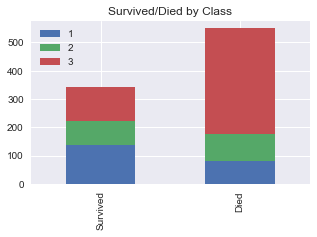

In [135]:
%matplotlib inline
import seaborn
seaborn.set() 

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
#Counts unique values in Series Pclass
survived_class = ds[ds['Survived'] == 1]['Pclass'].value_counts()
dead_class = ds[ds['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']

#Following data frame contans the 2 Series as columns, not rows:
#df_class2 = pd.DataFrame({'Survived': survived_class, 'Died': dead_class})

#survived_class
df_class.plot(kind='bar', stacked=True, figsize=(5,3), title="Survived/Died by Class")
print(df_class)

#df_class.ix[0,0] is not working! Because we have numeric indexes (labels) for columns as classes 1,2,3
#So 0,0 element s ix[0,1], we should use iloc for array-like element access ix[0,1] == iloc[0,0]

for i in df_class.columns:
    cl_surv_rate = df_class.ix[0,i] / df_class.ix[:,i].sum()
    print('Survive rate for class {0}: {1:.2f}'.format(i, cl_surv_rate))

### Survived by sex

          female  male
Survived     233   109
Died          81   468
Survive rate for male: 0.19
Survive rate for female: 0.74


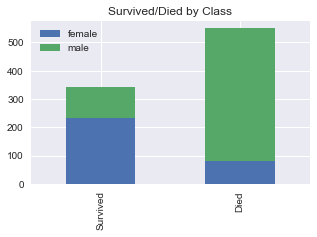

In [99]:
survived_sex = ds[ds.Survived == 1]['Sex'].value_counts()
died_sex = ds[ds.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, died_sex])
df_sex.index= ['Survived','Died']

df_sex.plot(kind='bar', stacked=True, figsize=(5,3), title="Survived/Died by Class")
#print(df_sex)
male_survived_rate = df_sex.male[0] / df_sex.male.sum()
female_survived_rate = df_sex.female[0] / df_sex.female.sum()

print('Survive rate for male: {0:.2f}'.format(male_survived_rate))
print('Survive rate for female: {0:.2f}'.format(female_survived_rate))

### Survived by age

Stack of men = 0.65, women = 0.35
Man class 3 survived rate = 0.14
Stack of class 3 man = 0.39, from men = 0.60


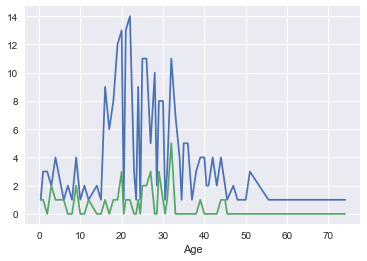

In [160]:
#ds[ds.Age > 0][['Age', 'Survived']].groupby('Age').count()
#ds[(ds.Age > 1) & (ds.Age < 5)]

#It's possible to apply more than one aggregations:
#grouped['C'].agg([np.sum, np.mean, np.std])
#ages = ds[ds.Pclass == 1].groupby('Age').count().PassengerId
#ages_surv = ds[ds.Pclass == 1].groupby('Age').sum().Survived

ages = ds[(ds.Pclass == 3) & (ds.Sex == 'male')].groupby('Age').count().PassengerId
ages_surv = ds[(ds.Pclass == 3) & (ds.Sex == 'male')].groupby('Age').sum().Survived
ages.plot()
ages_surv.plot()

men_count = len(ds[ds.Sex == 'male'])
men_share = men_count / len(ds)
women_share = 1 - men_share 
print('Stack of men = {0:.2f}, women = {1:.2f}'.format(men_share, women_share))

man_cl3 = ds[(ds.Sex == 'male') & (ds.Pclass == 3)].count().PassengerId
man_cl3_surv = ds[(ds.Sex == 'male') & (ds.Pclass == 3) & (ds.Survived)].count().PassengerId
print('Man class 3 survived rate = {0:.2f}'.format(man_cl3_surv/man_cl3))
print('Stack of class 3 man = {0:.2f}, from men = {1:.2f}'.format(man_cl3 / len(ds), man_cl3 / men_count))

#man_cl3 = ds[(ds.Sex == 'male') & (ds.Pclass == 3) & (ds.Age >= 25) & (ds.Age < 30)]



Man class 3 survived rate = 0.47
Stack of class 3 man = {0:.2f} 0.08080808080808081


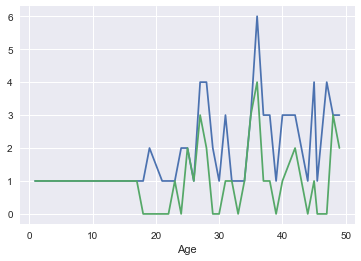

In [155]:
ages1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].groupby('Age').count().PassengerId
ages_surv1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].groupby('Age').sum().Survived
ages1.plot()
ages_surv1.plot()

man_cl1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].count().PassengerId
man_cl1_surv = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50) & (ds.Survived)].count().PassengerId
print('Man class 1 survived rate = {0:.2f}'.format(man_cl1_surv/man_cl1))
print('Stack of class 1 man = {0:.2f}', man_cl1 / len(ds))